In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.model_selection import KFold

__Decision tree: w/o any modification of missing data__

In [64]:
df = pd.read_csv('bank-data/bank-additional-full.csv')
bank_object_data = df.select_dtypes(include="object")
bank_object_data.info()

bank_non_object_data = df.select_dtypes(exclude="object")
print(bank_non_object_data.info())

label = LabelEncoder()
bank_object_data = bank_object_data.apply(label.fit_transform)

print(bank_object_data.head())

bank_final = pd.concat([bank_object_data, bank_non_object_data], axis = 1)
print(bank_final.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
job            41188 non-null object
marital        41188 non-null object
education      41188 non-null object
default        41188 non-null object
housing        41188 non-null object
loan           41188 non-null object
contact        41188 non-null object
month          41188 non-null object
day_of_week    41188 non-null object
poutcome       41188 non-null object
y              41188 non-null object
dtypes: object(11)
memory usage: 3.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
age               41188 non-null int64
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m       

__Decision tree: w/o any modification of missing data; k fold__

In [65]:
X = bank_final.drop(['y'], axis = 1)
Y = bank_final['y']

model = DecisionTreeClassifier(random_state=20)

kfold = KFold(n_splits=10, random_state=100, shuffle = True)
results_kfold = model_selection.cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))
print("Accuracy: %0.2f (+/- %0.2f)" % (results_kfold.mean(), results_kfold.std() * 2))
results_kfold

Accuracy: 88.73%
Accuracy: 0.89 (+/- 0.01)


array([0.88492353, 0.88565186, 0.88638019, 0.88905074, 0.88565186,
       0.88225297, 0.89002185, 0.88905074, 0.89533754, 0.88440991])

In [67]:
X = bank_final.drop(['y'], axis = 1)
Y = bank_final['y']

model = DecisionTreeClassifier(random_state=20)

kfold = KFold(n_splits=10)
results_kfold = model_selection.cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))
print("Accuracy: %0.2f (+/- %0.2f)" % (results_kfold.mean(), results_kfold.std() * 2))
print(results_kfold)

Accuracy: 87.31%
Accuracy: 0.87 (+/- 0.21)
[0.95508619 0.94950231 0.94294732 0.92328235 0.93517844 0.92740957
 0.8519058  0.85894635 0.79043225 0.59664886]


In [98]:
df = pd.read_csv('bank-data/bank-additional-full.csv')
t1 = df.copy()
for i in t1.columns:
    if len(t1.columns) > 4:
        t1.drop([i], axis = 1, inplace = True)
for i in t1.index:
    if len(t1.index) > 10:
        t1.drop([i], inplace = True)
t1 = t1.set_index(np.arange(0,len(t1)))

In [100]:
t1

,cons.conf.idx,euribor3m,nr.employed,y
0,-50.8,1.031,4963.6,yes
1,-50.8,1.028,4963.6,no
2,-50.8,1.028,4963.6,no
3,-50.8,1.028,4963.6,yes
4,-50.8,1.028,4963.6,no
5,-50.8,1.028,4963.6,yes
6,-50.8,1.028,4963.6,no
7,-50.8,1.028,4963.6,no
8,-50.8,1.028,4963.6,yes
9,-50.8,1.028,4963.6,no


In [101]:
X = t1.drop(['y'], axis = 1)
Y = t1['y']
kf = KFold(n_splits=5)
kf.split(t1) 
for train_index, test_index in kf.split(t1):
    #X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    #y_train, y_test = Y[train_index], Y[test_index]
    print(train_index, test_index)
    #print(X_train,y_train)
    #print(X_test,y_test)

[2 3 4 5 6 7 8 9] [0 1]
[0 1 4 5 6 7 8 9] [2 3]
[0 1 2 3 6 7 8 9] [4 5]
[0 1 2 3 4 5 8 9] [6 7]
[0 1 2 3 4 5 6 7] [8 9]


In [102]:
X = t1.drop(['y'], axis = 1)
Y = t1['y']
kf = KFold(n_splits=5, random_state=100, shuffle = True)
kf.split(t1) 
for train_index, test_index in kf.split(t1):
    #X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    #y_train, y_test = Y[train_index], Y[test_index]
    print(train_index, test_index)
    #print(X_train,y_train)
    #print(X_test,y_test)

[0 1 2 3 4 5 8 9] [6 7]
[0 2 3 4 6 7 8 9] [1 5]
[0 1 3 5 6 7 8 9] [2 4]
[1 2 4 5 6 7 8 9] [0 3]
[0 1 2 3 4 5 6 7] [8 9]


In [106]:
X = t1.drop(['y'], axis = 1)
Y = t1['y']
kf = KFold(n_splits=5, random_state=0, shuffle = True)
kf.split(X,Y) 
for train_index, test_index in kf.split(X):
    #X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    #y_train, y_test = Y[train_index], Y[test_index]
    print(train_index, test_index)
    #print(X_train,y_train)
    #print(X_test,y_test)
for train_index, test_index in kf.split(Y):
    #X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    #y_train, y_test = Y[train_index], Y[test_index]
    print(train_index, test_index)
    #print(X_train,y_train)
    #print(X_test,y_test)

[0 1 3 4 5 6 7 9] [2 8]
[0 1 2 3 5 6 7 8] [4 9]
[0 2 3 4 5 7 8 9] [1 6]
[0 1 2 4 5 6 8 9] [3 7]
[1 2 3 4 6 7 8 9] [0 5]
[0 1 3 4 5 6 7 9] [2 8]
[0 1 2 3 5 6 7 8] [4 9]
[0 2 3 4 5 7 8 9] [1 6]
[0 1 2 4 5 6 8 9] [3 7]
[1 2 3 4 6 7 8 9] [0 5]


In [112]:
X = t1.drop(['y'], axis = 1)
Y = t1['y']
skf = StratifiedKFold(n_splits=5, random_state=100, shuffle = True)
skf.split(X, Y) 
for train_index in skf.split(X,Y):
    #X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    #y_train, y_test = Y[train_index], Y[test_index]
    print(train_index)
    #print(X_train,y_train)
    #print(X_test,y_test)

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([8, 9]))
(array([0, 2, 4, 5, 6, 7, 8, 9]), array([1, 3]))
(array([1, 2, 3, 4, 5, 6, 8, 9]), array([0, 7]))
(array([0, 1, 3, 4, 6, 7, 8, 9]), array([2, 5]))
(array([0, 1, 2, 3, 5, 7, 8, 9]), array([4, 6]))


C:\Python3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [74]:

clf = DecisionTreeClassifier(random_state=20)
kf = KFold(n_splits=10, random_state=100, shuffle = True)
kf.split(bank_final) 
for train_index, test_index in kf.split(bank_final):
    print(train_index, test_index)

[    0     1     2 ... 41185 41186 41187] [    7     8    12 ... 41174 41178 41183]
[    0     1     2 ... 41185 41186 41187] [   19    24    52 ... 41167 41169 41184]
[    0     1     2 ... 41185 41186 41187] [   31    36    38 ... 41152 41156 41162]
[    0     1     3 ... 41184 41185 41186] [    2     5     6 ... 41159 41164 41187]
[    0     1     2 ... 41184 41186 41187] [    3     4    11 ... 41170 41180 41185]
[    0     1     2 ... 41184 41185 41187] [   13    21    41 ... 41168 41173 41186]
[    0     2     3 ... 41185 41186 41187] [    1    10    15 ... 41175 41177 41181]
[    1     2     3 ... 41185 41186 41187] [    0    14    18 ... 41155 41172 41179]
[    0     1     2 ... 41185 41186 41187] [   27    48    62 ... 41143 41144 41182]
[    0     1     2 ... 41185 41186 41187] [    9    28    40 ... 41154 41171 41176]


In [71]:
clf = DecisionTreeClassifier(random_state=20)
kf = KFold(n_splits=10, random_state=100, shuffle = True)
kf.split(X,Y) 
# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
accuracy_model = []

# Iterate over each train-test split
for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    # Train the model
    model = clf.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)
 
# Print the accuracy    
print(accuracy_model)


[88.49235251274581, 88.56518572469045, 88.6380189366351, 88.90507404709881, 88.56518572469045, 88.22529740228211, 89.00218499635834, 88.90507404709881, 89.53375424963575, 88.44099077221952]


In [72]:
import statistics
print(statistics.mean(accuracy_model))
print(statistics.stdev(accuracy_model))

88.72731184134551
0.37101220836588134


__Decision tree: w/o any modification of missing data; stratified k fold__

In [40]:
from sklearn.model_selection import StratifiedKFold
X = bank_final.drop(['y'], axis = 1)
Y = bank_final['y']

model = DecisionTreeClassifier(random_state=20)

skfold = StratifiedKFold(n_splits=10, random_state=100, shuffle = True)
results_kfold = model_selection.cross_val_score(model, X, Y, cv=skfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 
print("Accuracy: %0.2f (+/- %0.2f)" % (results_kfold.mean(), results_kfold.std() * 2))
results_kfold

Accuracy: 88.80%
Accuracy: 0.89 (+/- 0.00)


array([0.8926924 , 0.88589463, 0.88759408, 0.88807963, 0.8873513 ,
       0.89026463, 0.88565186, 0.88783685, 0.8863526 , 0.88878096])

__Decision tree: deleting missing data__

In [2]:
df = pd.read_csv('bank-data/bank-additional-full.csv')
print(df.shape)
print(df.columns)
print((df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']] == 'unknown').sum())

df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']] = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']].replace('unknown', np.NaN)
print(df.isnull().sum())

df.dropna(inplace=True)
# summarize the number of rows and columns in the dataset
print(df.shape)

NameError: name 'pd' is not defined

In [1]:
bank_object_data = df.select_dtypes(include="object")
print(bank_object_data.info())

bank_non_object_data = df.select_dtypes(exclude="object")
print(bank_non_object_data.info())

label = LabelEncoder()
bank_object_data = bank_object_data.apply(label.fit_transform)

print(bank_object_data.head())

bank_final = pd.concat([bank_object_data, bank_non_object_data], axis = 1)

print(bank_final.head())

NameError: name 'df' is not defined

In [50]:
X = bank_final.drop(['y'], axis = 1)
Y = bank_final['y']

model = DecisionTreeClassifier(random_state=20)

kfold = KFold(n_splits=10, random_state=100, shuffle = True)
results_kfold = model_selection.cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 
print("Accuracy: %0.2f (+/- %0.2f)" % (results_kfold.mean(), results_kfold.std() * 2))
results_kfold

Accuracy: 87.84%
Accuracy: 0.88 (+/- 0.01)


array([0.89078386, 0.87569695, 0.87602493, 0.8806166 , 0.87700886,
       0.88291243, 0.87536897, 0.8806166 , 0.87467192, 0.87040682])

__Decision Tree: deleting missing data; stratified k fold__

In [51]:
from sklearn.model_selection import StratifiedKFold
X = bank_final.drop(['y'], axis = 1)
Y = bank_final['y']

model = DecisionTreeClassifier(random_state=20)

skfold = StratifiedKFold(n_splits=10, random_state=100, shuffle = True)
results_kfold = model_selection.cross_val_score(model, X, Y, cv=skfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 
print("Accuracy: %0.2f (+/- %0.2f)" % (results_kfold.mean(), results_kfold.std() * 2))
results_kfold

Accuracy: 87.83%
Accuracy: 0.88 (+/- 0.01)


array([0.8806166 , 0.87963267, 0.88094457, 0.87602493, 0.87012135,
       0.87668088, 0.88717612, 0.87602493, 0.87828084, 0.87729659])

__Decision Tree: with imputation__

In [2]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

df = pd.read_csv('bank-data/bank-additional-full.csv')
print(df.shape)
print(df.columns)
print((df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']] == 'unknown').sum())

df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']] = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']].replace('unknown', np.NaN)
print(df.isnull().sum())

(41188, 21)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64
age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month        

C:\Python3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [3]:
bank_object_data = df.select_dtypes(include="object")
print(bank_object_data.info())

bank_non_object_data = df.select_dtypes(exclude="object")
print(bank_non_object_data.info())

values = bank_non_object_data.values
#imputer = Imputer()
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
print(np.isnan(transformed_values).sum())
print(np.isnan(bank_non_object_data.values).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
job            40858 non-null object
marital        41108 non-null object
education      39457 non-null object
default        32591 non-null object
housing        40198 non-null object
loan           40198 non-null object
contact        41188 non-null object
month          41188 non-null object
day_of_week    41188 non-null object
poutcome       41188 non-null object
y              41188 non-null object
dtypes: object(11)
memory usage: 3.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
age               41188 non-null int64
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m  

In [4]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)


bank_object_data = DataFrameImputer().fit_transform(bank_object_data)

In [5]:
label = LabelEncoder()
bank_object_data = bank_object_data.apply(label.fit_transform)

print(bank_object_data.head())

bank_final = pd.concat([bank_object_data, bank_non_object_data], axis = 1)

print(bank_final.head())

   job  marital  education  default  housing  loan  contact  month  \
0    3        1          0        0        0     0        1      6   
1    7        1          3        0        0     0        1      6   
2    7        1          3        0        1     0        1      6   
3    0        1          1        0        0     0        1      6   
4    7        1          3        0        0     1        1      6   

   day_of_week  poutcome  y  
0            1         1  0  
1            1         1  0  
2            1         1  0  
3            1         1  0  
4            1         1  0  
   job  marital  education  default  housing  loan  contact  month  \
0    3        1          0        0        0     0        1      6   
1    7        1          3        0        0     0        1      6   
2    7        1          3        0        1     0        1      6   
3    0        1          1        0        0     0        1      6   
4    7        1          3        0        0     

__Decision Tree: with imputation; k fold__

In [6]:
X = bank_final.drop(['y'], axis = 1)
Y = bank_final['y']

model = DecisionTreeClassifier(random_state=20)

kfold = KFold(n_splits=10, random_state=100, shuffle = True)
results_kfold = model_selection.cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 
print("Accuracy: %0.2f (+/- %0.2f)" % (results_kfold.mean(), results_kfold.std() * 2))
results_kfold

Accuracy: 88.87%
Accuracy: 0.89 (+/- 0.01)


array([0.88662297, 0.88832241, 0.88662297, 0.89099296, 0.88759408,
       0.88346686, 0.89414907, 0.8895363 , 0.89290918, 0.88659543])

In [7]:
X = bank_final.drop(['y'], axis = 1)
Y = bank_final['y']

model = DecisionTreeClassifier(random_state=20)

kfold = KFold(n_splits=10, random_state=100, shuffle = True)
results_kfold = model_selection.cross_val_score(model, X, Y, scoring='precision', cv=kfold)
print("Precision: %.2f%%" % (results_kfold.mean()*100.0)) 
print("Precision: %0.2f (+/- %0.2f)" % (results_kfold.mean(), results_kfold.std() * 2))
results_kfold

Precision: 50.57%
Precision: 0.51 (+/- 0.04)


array([0.49806202, 0.4762931 , 0.51195219, 0.52904564, 0.52834008,
       0.49656751, 0.53950339, 0.51875   , 0.47619048, 0.48240166])

In [8]:
X = bank_final.drop(['y'], axis = 1)
Y = bank_final['y']

model = DecisionTreeClassifier(random_state=20)

kfold = KFold(n_splits=10, random_state=100, shuffle = True)
results_kfold = model_selection.cross_val_score(model, X, Y, scoring='recall', cv=kfold)
print("Recall: %.2f%%" % (results_kfold.mean()*100.0)) 
print("Recall: %0.2f (+/- %0.2f)" % (results_kfold.mean(), results_kfold.std() * 2))
results_kfold

Recall: 51.92%
Recall: 0.52 (+/- 0.05)


array([0.55268817, 0.50456621, 0.53653445, 0.53459119, 0.53156823,
       0.45492662, 0.507431  , 0.52642706, 0.52505967, 0.51777778])

__Decision Tree: with imputation; stratified k fold__

In [9]:
from sklearn.model_selection import StratifiedKFold
X = bank_final.drop(['y'], axis = 1)
Y = bank_final['y']

model = DecisionTreeClassifier(random_state=20)

skfold = StratifiedKFold(n_splits=10, random_state=100, shuffle = True)
results_kfold = model_selection.cross_val_score(model, X, Y, cv=skfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 
print("Accuracy: %0.2f (+/- %0.2f)" % (results_kfold.mean(), results_kfold.std() * 2))
results_kfold

Accuracy: 88.82%
Accuracy: 0.89 (+/- 0.00)


array([0.88468075, 0.89172129, 0.88783685, 0.88905074, 0.89099296,
       0.88710852, 0.88419519, 0.89075018, 0.88829529, 0.88756678])

In [10]:
from sklearn.model_selection import StratifiedKFold
X = bank_final.drop(['y'], axis = 1)
Y = bank_final['y']

model = DecisionTreeClassifier(random_state=20)

skfold = StratifiedKFold(n_splits=10, random_state=100, shuffle = True)
results_kfold = model_selection.cross_val_score(model, X, Y, scoring='precision', cv=skfold)
print("Precision: %.2f%%" % (results_kfold.mean()*100.0)) 
print("Precision: %0.2f (+/- %0.2f)" % (results_kfold.mean(), results_kfold.std() * 2))
results_kfold

Precision: 50.37%
Precision: 0.50 (+/- 0.02)


array([0.48806941, 0.51851852, 0.50195312, 0.50736842, 0.51559252,
       0.4989154 , 0.48697395, 0.51428571, 0.504329  , 0.50107991])

In [11]:
from sklearn.model_selection import StratifiedKFold
X = bank_final.drop(['y'], axis = 1)
Y = bank_final['y']

model = DecisionTreeClassifier(random_state=20)

skfold = StratifiedKFold(n_splits=10, random_state=100, shuffle = True)
results_kfold = model_selection.cross_val_score(model, X, Y, scoring='recall', cv=skfold)
print("Recall: %.2f%%" % (results_kfold.mean()*100.0)) 
print("Recall: %0.2f (+/- %0.2f)" % (results_kfold.mean(), results_kfold.std() * 2))
results_kfold

Recall: 52.00%
Recall: 0.52 (+/- 0.04)


array([0.48491379, 0.54310345, 0.55387931, 0.51939655, 0.53448276,
       0.49568966, 0.5237069 , 0.54310345, 0.50215517, 0.5       ])

In [19]:
import matplotlib.pylab as plt
import matplotlib.patches as patches
from sklearn.metrics import roc_curve,auc
from scipy import interp

In [44]:
from numpy import interp as interp1

C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\Bala\AppData\Roaming\

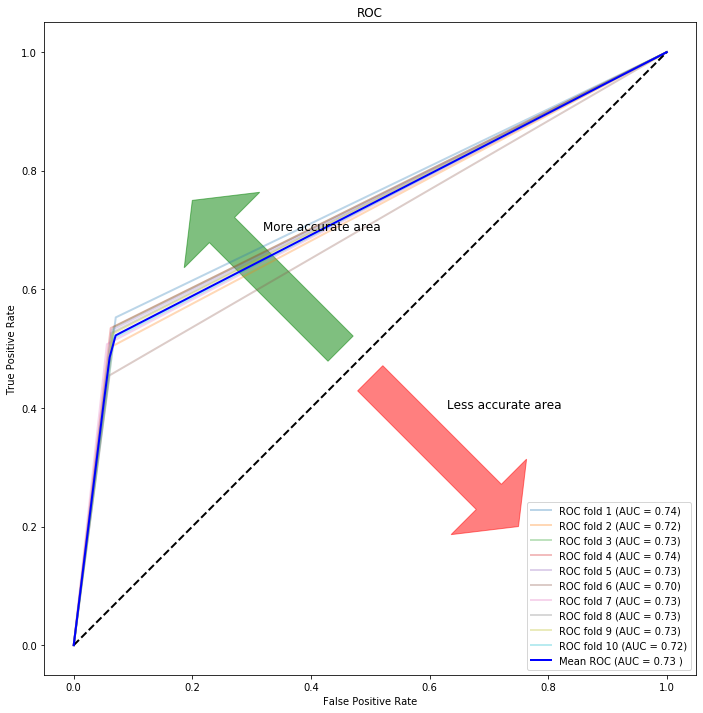

In [21]:
x = bank_final.drop(['y'], axis = 1)
y = bank_final['y']

clf = DecisionTreeClassifier(random_state=20)
cv = KFold(n_splits=10, random_state=100, shuffle = True)
# plot arrows
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\Bala\AppData\Roaming\

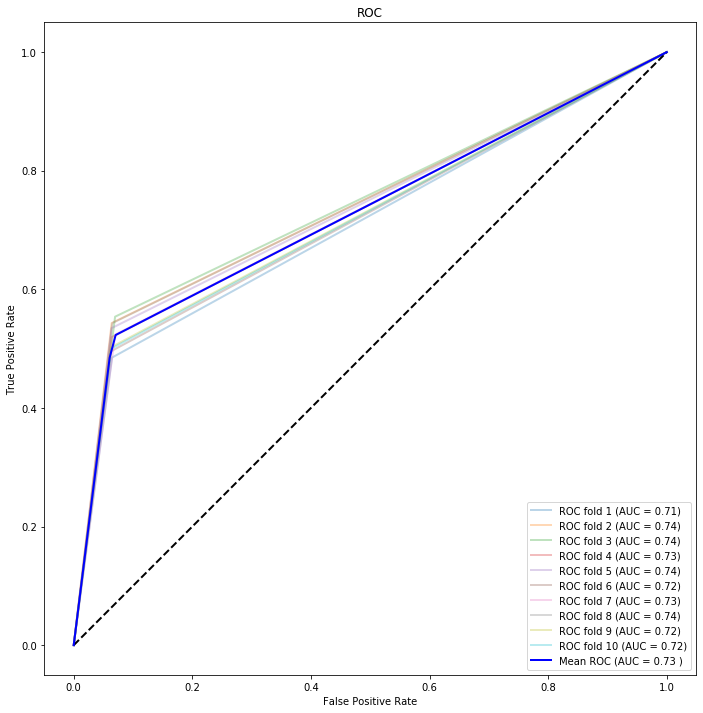

(4118, 2)


In [27]:
x = bank_final.drop(['y'], axis = 1)
y = bank_final['y']

clf = DecisionTreeClassifier(random_state=20)
cv = StratifiedKFold(n_splits=10, random_state=100, shuffle = True)
# plot arrows
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
#ax1.add_patch(
 #   patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
  #  )
#ax1.add_patch(
 #   patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
  #  )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()
print(prediction.shape)

In [34]:
x = bank_final.drop(['y'], axis = 1)
y = bank_final['y']

clf = DecisionTreeClassifier(random_state=20)
cv = StratifiedKFold(n_splits=10, random_state=100, shuffle = True)

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
print(mean_fpr)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    print(tprs)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
    print('done')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
#print(tprs)

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app


[array([0.        , 0.07585858, 0.15171716, 0.22757575, 0.30343433,
       0.37929291, 0.45515149, 0.48829362, 0.49385564, 0.49941767,
       0.5049797 , 0.51054172, 0.51610375, 0.52166577, 0.5272278 ,
       0.53278983, 0.53835185, 0.54391388, 0.5494759 , 0.55503793,
       0.56059995, 0.56616198, 0.57172401, 0.57728603, 0.58284806,
       0.58841008, 0.59397211, 0.59953414, 0.60509616, 0.61065819,
       0.61622021, 0.62178224, 0.62734427, 0.63290629, 0.63846832,
       0.64403034, 0.64959237, 0.65515439, 0.66071642, 0.66627845,
       0.67184047, 0.6774025 , 0.68296452, 0.68852655, 0.69408858,
       0.6996506 , 0.70521263, 0.71077465, 0.71633668, 0.72189871,
       0.72746073, 0.73302276, 0.73858478, 0.74414681, 0.74970883,
       0.75527086, 0.76083289, 0.76639491, 0.77195694, 0.77751896,
       0.78308099, 0.78864302, 0.79420504, 0.79976707, 0.80532909,
       0.81089112, 0.81645315, 0.82201517, 0.8275772 , 0.83313922,
       0.83870125, 0.84426328, 0.8498253 , 0.85538733, 0.8609

C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app


[array([0.        , 0.07585858, 0.15171716, 0.22757575, 0.30343433,
       0.37929291, 0.45515149, 0.48829362, 0.49385564, 0.49941767,
       0.5049797 , 0.51054172, 0.51610375, 0.52166577, 0.5272278 ,
       0.53278983, 0.53835185, 0.54391388, 0.5494759 , 0.55503793,
       0.56059995, 0.56616198, 0.57172401, 0.57728603, 0.58284806,
       0.58841008, 0.59397211, 0.59953414, 0.60509616, 0.61065819,
       0.61622021, 0.62178224, 0.62734427, 0.63290629, 0.63846832,
       0.64403034, 0.64959237, 0.65515439, 0.66071642, 0.66627845,
       0.67184047, 0.6774025 , 0.68296452, 0.68852655, 0.69408858,
       0.6996506 , 0.70521263, 0.71077465, 0.71633668, 0.72189871,
       0.72746073, 0.73302276, 0.73858478, 0.74414681, 0.74970883,
       0.75527086, 0.76083289, 0.76639491, 0.77195694, 0.77751896,
       0.78308099, 0.78864302, 0.79420504, 0.79976707, 0.80532909,
       0.81089112, 0.81645315, 0.82201517, 0.8275772 , 0.83313922,
       0.83870125, 0.84426328, 0.8498253 , 0.85538733, 0.8609

C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app


[array([0.        , 0.07585858, 0.15171716, 0.22757575, 0.30343433,
       0.37929291, 0.45515149, 0.48829362, 0.49385564, 0.49941767,
       0.5049797 , 0.51054172, 0.51610375, 0.52166577, 0.5272278 ,
       0.53278983, 0.53835185, 0.54391388, 0.5494759 , 0.55503793,
       0.56059995, 0.56616198, 0.57172401, 0.57728603, 0.58284806,
       0.58841008, 0.59397211, 0.59953414, 0.60509616, 0.61065819,
       0.61622021, 0.62178224, 0.62734427, 0.63290629, 0.63846832,
       0.64403034, 0.64959237, 0.65515439, 0.66071642, 0.66627845,
       0.67184047, 0.6774025 , 0.68296452, 0.68852655, 0.69408858,
       0.6996506 , 0.70521263, 0.71077465, 0.71633668, 0.72189871,
       0.72746073, 0.73302276, 0.73858478, 0.74414681, 0.74970883,
       0.75527086, 0.76083289, 0.76639491, 0.77195694, 0.77751896,
       0.78308099, 0.78864302, 0.79420504, 0.79976707, 0.80532909,
       0.81089112, 0.81645315, 0.82201517, 0.8275772 , 0.83313922,
       0.83870125, 0.84426328, 0.8498253 , 0.85538733, 0.8609

C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app


[array([0.        , 0.07585858, 0.15171716, 0.22757575, 0.30343433,
       0.37929291, 0.45515149, 0.48829362, 0.49385564, 0.49941767,
       0.5049797 , 0.51054172, 0.51610375, 0.52166577, 0.5272278 ,
       0.53278983, 0.53835185, 0.54391388, 0.5494759 , 0.55503793,
       0.56059995, 0.56616198, 0.57172401, 0.57728603, 0.58284806,
       0.58841008, 0.59397211, 0.59953414, 0.60509616, 0.61065819,
       0.61622021, 0.62178224, 0.62734427, 0.63290629, 0.63846832,
       0.64403034, 0.64959237, 0.65515439, 0.66071642, 0.66627845,
       0.67184047, 0.6774025 , 0.68296452, 0.68852655, 0.69408858,
       0.6996506 , 0.70521263, 0.71077465, 0.71633668, 0.72189871,
       0.72746073, 0.73302276, 0.73858478, 0.74414681, 0.74970883,
       0.75527086, 0.76083289, 0.76639491, 0.77195694, 0.77751896,
       0.78308099, 0.78864302, 0.79420504, 0.79976707, 0.80532909,
       0.81089112, 0.81645315, 0.82201517, 0.8275772 , 0.83313922,
       0.83870125, 0.84426328, 0.8498253 , 0.85538733, 0.8609

C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app


[array([0.        , 0.07585858, 0.15171716, 0.22757575, 0.30343433,
       0.37929291, 0.45515149, 0.48829362, 0.49385564, 0.49941767,
       0.5049797 , 0.51054172, 0.51610375, 0.52166577, 0.5272278 ,
       0.53278983, 0.53835185, 0.54391388, 0.5494759 , 0.55503793,
       0.56059995, 0.56616198, 0.57172401, 0.57728603, 0.58284806,
       0.58841008, 0.59397211, 0.59953414, 0.60509616, 0.61065819,
       0.61622021, 0.62178224, 0.62734427, 0.63290629, 0.63846832,
       0.64403034, 0.64959237, 0.65515439, 0.66071642, 0.66627845,
       0.67184047, 0.6774025 , 0.68296452, 0.68852655, 0.69408858,
       0.6996506 , 0.70521263, 0.71077465, 0.71633668, 0.72189871,
       0.72746073, 0.73302276, 0.73858478, 0.74414681, 0.74970883,
       0.75527086, 0.76083289, 0.76639491, 0.77195694, 0.77751896,
       0.78308099, 0.78864302, 0.79420504, 0.79976707, 0.80532909,
       0.81089112, 0.81645315, 0.82201517, 0.8275772 , 0.83313922,
       0.83870125, 0.84426328, 0.8498253 , 0.85538733, 0.8609

[array([0.        , 0.07585858, 0.15171716, 0.22757575, 0.30343433,
       0.37929291, 0.45515149, 0.48829362, 0.49385564, 0.49941767,
       0.5049797 , 0.51054172, 0.51610375, 0.52166577, 0.5272278 ,
       0.53278983, 0.53835185, 0.54391388, 0.5494759 , 0.55503793,
       0.56059995, 0.56616198, 0.57172401, 0.57728603, 0.58284806,
       0.58841008, 0.59397211, 0.59953414, 0.60509616, 0.61065819,
       0.61622021, 0.62178224, 0.62734427, 0.63290629, 0.63846832,
       0.64403034, 0.64959237, 0.65515439, 0.66071642, 0.66627845,
       0.67184047, 0.6774025 , 0.68296452, 0.68852655, 0.69408858,
       0.6996506 , 0.70521263, 0.71077465, 0.71633668, 0.72189871,
       0.72746073, 0.73302276, 0.73858478, 0.74414681, 0.74970883,
       0.75527086, 0.76083289, 0.76639491, 0.77195694, 0.77751896,
       0.78308099, 0.78864302, 0.79420504, 0.79976707, 0.80532909,
       0.81089112, 0.81645315, 0.82201517, 0.8275772 , 0.83313922,
       0.83870125, 0.84426328, 0.8498253 , 0.85538733, 0.8609

C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app


C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\Bala\AppData\Roaming\

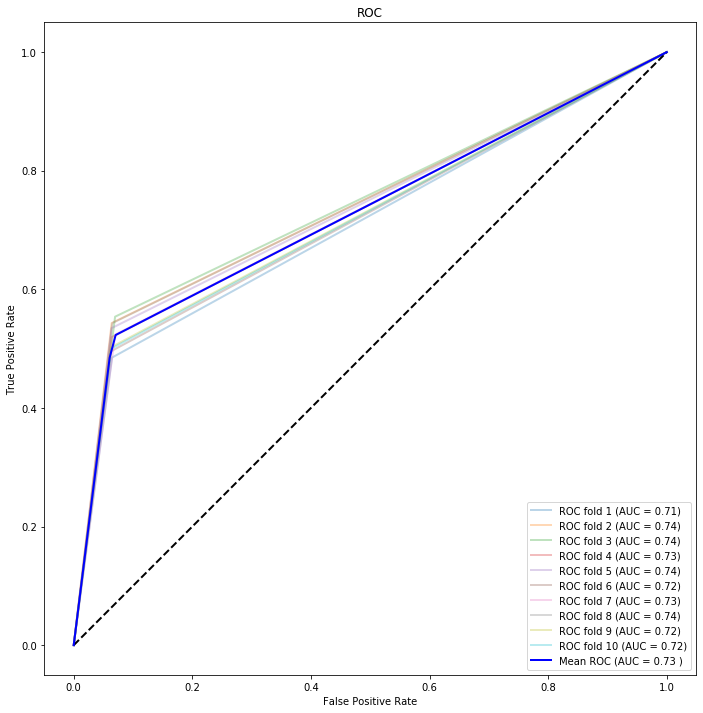

In [35]:
x = bank_final.drop(['y'], axis = 1)
y = bank_final['y']

clf = DecisionTreeClassifier(random_state=20)
cv = StratifiedKFold(n_splits=10, random_state=100, shuffle = True)
# plot arrows
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
#ax1.add_patch(
 #   patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
  #  )
#ax1.add_patch(
 #   patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
  #  )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prob = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])[:,1]
    fpr, tpr, t = roc_curve(y[test], prob)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()
#print(prediction.shape)

C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  app.launch_new_instance()
C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  app.launch_new_instance()
C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  app.launch_new_instance()
C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  app.launch_new_instance()
C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: DeprecationWarning: scipy.

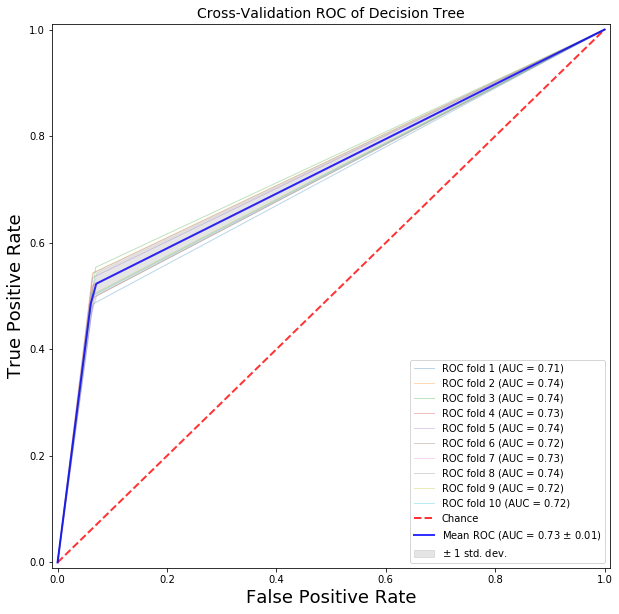

In [42]:
X_train_res = bank_final.drop(['y'], axis = 1)
y_train_res = bank_final['y']

cv = StratifiedKFold(n_splits=10, random_state=100, shuffle = True)
classifier = DecisionTreeClassifier(random_state=20)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 1
for train, test in cv.split(X_train_res, y_train_res):
    probas_ = classifier.fit(X_train_res.iloc[train], y_train_res.iloc[train]).predict_proba(X_train_res.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train_res[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Decision Tree',fontsize=14)
plt.legend(loc="lower right", prop={'size': 10})
plt.show()

C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  app.launch_new_instance()
C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  app.launch_new_instance()
C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  app.launch_new_instance()
C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  app.launch_new_instance()
C:\Users\Bala\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: DeprecationWarning: scipy.

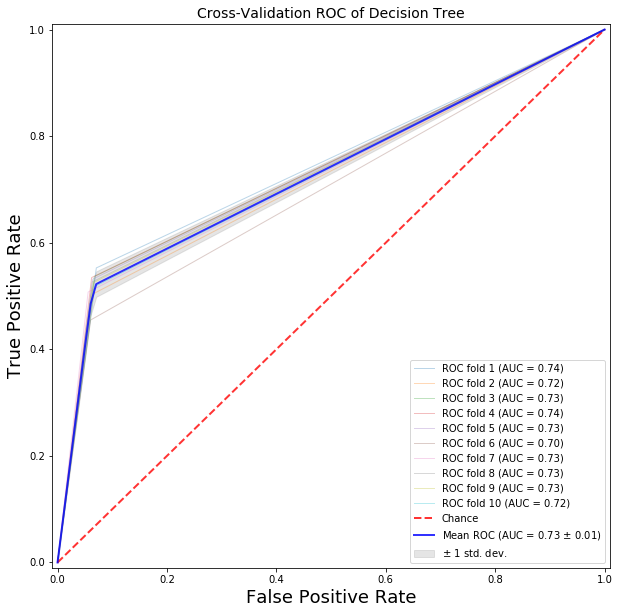

In [43]:
X_train_res = bank_final.drop(['y'], axis = 1)
y_train_res = bank_final['y']

cv = KFold(n_splits=10, random_state=100, shuffle = True)
classifier = DecisionTreeClassifier(random_state=20)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 1
for train, test in cv.split(X_train_res, y_train_res):
    probas_ = classifier.fit(X_train_res.iloc[train], y_train_res.iloc[train]).predict_proba(X_train_res.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train_res[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Decision Tree',fontsize=14)
plt.legend(loc="lower right", prop={'size': 10})
plt.show()

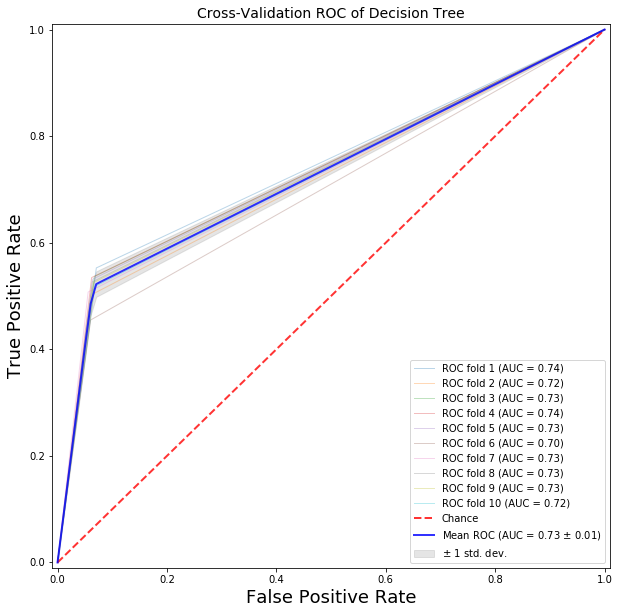

In [45]:
X_train_res = bank_final.drop(['y'], axis = 1)
y_train_res = bank_final['y']

cv = KFold(n_splits=10, random_state=100, shuffle = True)
classifier = DecisionTreeClassifier(random_state=20)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 1
for train, test in cv.split(X_train_res, y_train_res):
    probas_ = classifier.fit(X_train_res.iloc[train], y_train_res.iloc[train]).predict_proba(X_train_res.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train_res[test], probas_[:, 1])
    tprs.append(interp1(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Decision Tree',fontsize=14)
plt.legend(loc="lower right", prop={'size': 10})
plt.show()